## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import os
from PIL import Image
from random import shuffle

%matplotlib inline
import matplotlib.pyplot as plt

In [33]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/voiceai/Residency 8/Project/Project 2 -- CNN/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [8]:
labels = pd.read_csv("/content/labels.csv")
labels.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [9]:
breed_count = labels.breed.value_counts()
print(breed_count.head(5))
print("-------------------")
print("Shape: ", breed_count.shape)

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64
-------------------
Shape:  (120,)


### Get one-hot encodings of labels

In [0]:
targets = pd.Series(labels.breed)
onehot = pd.get_dummies(targets, sparse = True)
onehot_labels = np.asarray(onehot)

In [11]:
onehot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

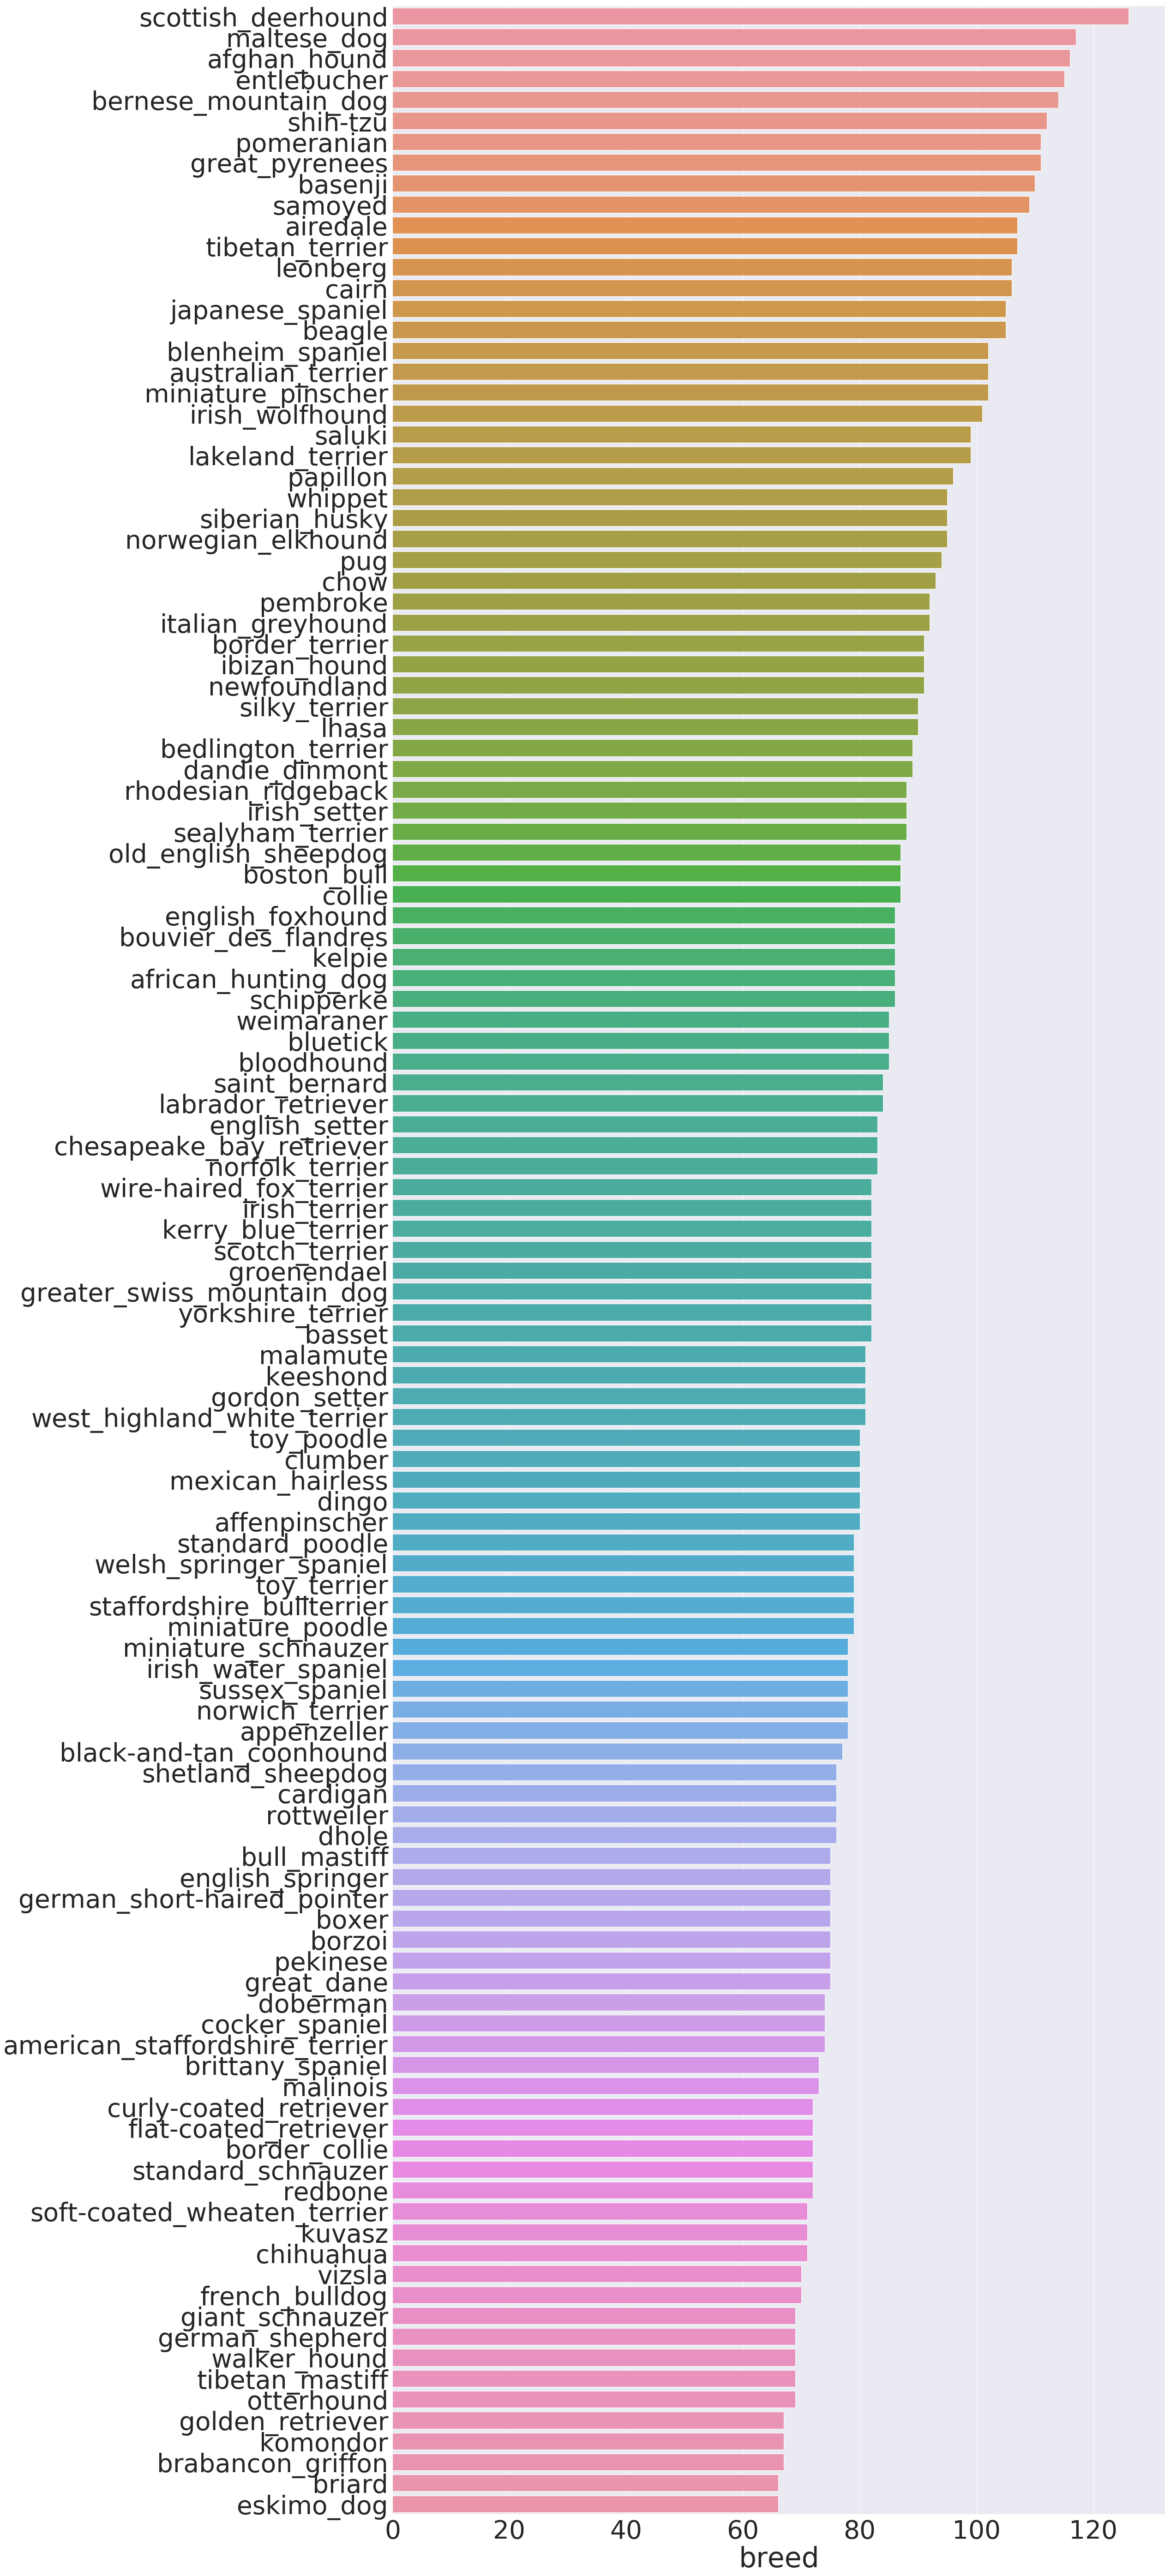

In [12]:
import seaborn as sns

# Horizontal bar plot
plt.figure(figsize=(30,100))
sns.set(style="whitegrid")
sns.set(font_scale=5)
ax = sns.barplot(breed_count,breed_count.index)
plt.show()

Good news, the distribution is relatively balanced. The less represented breed contrains 65 images and the more represented contains 110 images.

Bad news, there isn't a lot of images per class. In this context we need to be careful to overfitting.

In [0]:
sns.set(font_scale=2)
n_breeds = len(breed_count.index)
print('Number of breeds : ', n_breeds)
for i in range(n_breeds):
    br = breed_count.index[i]
    path = labels.loc[labels['breed'] == br].iloc[0].id + '.jpg'
    path = os.path.join('/content/','train',path)
    img = plt.imread(path)
    plt.axis('off')
    plt.imshow(img)
    plt.show() 

Output hidden; open in https://colab.research.google.com to view.

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
#Declare Variables
IMG_HEIGHT=128
IMG_WIDTH = 128
#array for resized images
images =[]
#array for labels
classes=[]

In [14]:
from tqdm import tqdm
import cv2

#Get Images, resize and assign to images array
for f, img in tqdm(labels.values):
	train_img = cv2.imread('/content/train/{}.jpg'.format(f), 1)
	train_img_resize = cv2.resize(train_img, (IMG_HEIGHT, IMG_WIDTH))
	images.append(train_img_resize)

100%|██████████| 10222/10222 [00:23<00:00, 440.47it/s]


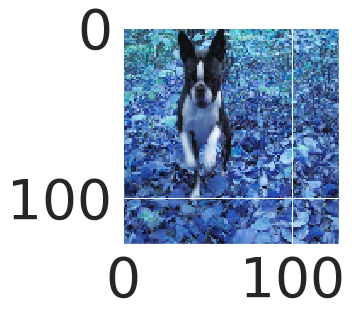

In [15]:
plt.imshow(images[0])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [16]:
#assign images and labes to numpy arrays
classes = onehot_labels
x_train = np.asarray(images, dtype=np.float32)
y_train = np.asarray(classes, dtype=np.uint8)

print(x_train.shape)
print(y_train.shape)

(10222, 128, 128, 3)
(10222, 120)


### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

#train test split takes train and test data and labels. in this case 70% train, 30% test
xtrain, xval, ytrain, yval = train_test_split(x_train, y_train, test_size = 0.3, shuffle = True)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [18]:
sample = pd.read_csv("/content/sample_submission.csv")
sample.head(5)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [19]:
test_img = sample.id
test_img.head(5)

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [20]:
x_test_feature = []

i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('/content/test/{}.jpg'.format(f), 3)
    img_resize = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:22<00:00, 451.30it/s]


Normalize the test data and convert it into 4 dimensions

In [21]:
x_test = np.asarray(x_test_feature, dtype=np.uint8)
print(x_test.shape)

(10357, 128, 128, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization

Using TensorFlow backend.


In [23]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (5, 5), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(64, kernel_size = (3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(120, activation = 'softmax'))

model.summary()

W0630 18:51:52.970578 140716772931456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0630 18:51:53.013570 140716772931456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 18:51:53.019142 140716772931456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1048576)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               268435712 
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
Total params: 268,487,480
Trainable params: 268,487,480
Non-trainable params: 0
_________________________________________________________________


### Use batch_size = 128 and epochs = 10 and execute the model

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

W0630 18:51:57.783191 140716772931456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0630 18:51:57.808461 140716772931456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0630 18:51:57.813843 140716772931456 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
model.fit(xtrain, ytrain, batch_size = 128, epochs = 10, verbose = 1)

W0630 18:52:01.803474 140716772931456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
7155/7155 [==============================] - 37s 5ms/step - loss: 0.2635 - acc: 0.9835
Epoch 2/10
7155/7155 [==============================] - 22s 3ms/step - loss: 0.2652 - acc: 0.9835
Epoch 3/10
7155/7155 [==============================] - 23s 3ms/step - loss: 0.2652 - acc: 0.9835
Epoch 4/10
7155/7155 [==============================] - 23s 3ms/step - loss: 0.2652 - acc: 0.9835
Epoch 5/10
7155/7155 [==============================] - 23s 3ms/step - loss: 0.2652 - acc: 0.9835
Epoch 6/10
7155/7155 [==============================] - 23s 3ms/step - loss: 0.2652 - acc: 0.9835
Epoch 7/10
7155/7155 [==============================] - 23s 3ms/step - loss: 0.2652 - acc: 0.9835
Epoch 8/10
7155/7155 [==============================] - 23s 3ms/step - loss: 0.2652 - acc: 0.9835
Epoch 9/10
7155/7155 [==============================] - 23s 3ms/step - loss: 0.2652 - acc: 0.9835
Epoch 10/10
7155/7155 [==============================] - 23s 3ms/step - loss: 0.2652 - acc: 0.9835


In [26]:
score = model.evaluate(xval, yval, verbose = 1)
print(('Validation loss: {0:.2f}%').format(score[0]*100))
print(('Validation accuracy: {0:.2f}%').format(score[1]*100))

3067/3067 [==============================] - 3s 889us/step
Validation loss: 26.41%
Validation accuracy: 98.35%


### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, 
                                   samplewise_std_normalization=False, zca_whitening=False, rotation_range=50, 
                                   width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, 
                                   vertical_flip=False, data_format='channels_last')

valid_datagen = ImageDataGenerator()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(xtrain, ytrain, batch_size = 128)
valid_generator = valid_datagen.flow(xval, yval, batch_size = 128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [30]:
#fit model
model.fit_generator(train_generator, steps_per_epoch = 255, epochs = 10, 
                    validation_data = valid_generator, validation_steps = xval.shape[0])

Epoch 1/10
255/255 [==============================] - 378s 1s/step - loss: 0.2652 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 2/10
255/255 [==============================] - 373s 1s/step - loss: 0.2652 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 3/10
255/255 [==============================] - 373s 1s/step - loss: 0.2652 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 4/10
255/255 [==============================] - 373s 1s/step - loss: 0.2652 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 5/10
255/255 [==============================] - 374s 1s/step - loss: 0.2653 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 6/10
255/255 [==============================] - 373s 1s/step - loss: 0.2651 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 7/10
255/255 [==============================] - 373s 1s/step - loss: 0.2652 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 8/10
255/255 [==============================] - 373s 1s/step - 

In [31]:
_score = model.evaluate(xval, yval, verbose = 1)
print(('Validation loss: {0:.2f}%').format(_score[0]*100))
print(('Validation accuracy: {0:.2f}%').format(_score[1]*100))

3067/3067 [==============================] - 2s 756us/step
Validation loss: 26.41%
Validation accuracy: 98.35%


# The Accuracy of Model remains the same it has not dropped.

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [34]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path + 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top = False, pooling = 'avg')

W0630 20:05:07.951645 140716772931456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Print the summary of the base_model

In [35]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from keras import Model, Input
from keras.layers import BatchNormalization,Flatten

In [38]:
modelvgg = base_model.output

modelvgg = BatchNormalization()(modelvgg)
modelvgg = Dropout(0.35)(modelvgg)
modelvgg = Dense(1024, activation='relu')(modelvgg)
modelvgg = Dense(256, activation='relu')(modelvgg)
modelvgg = Dense(256, activation='relu')(modelvgg)
modelvgg = Dropout(0.15)(modelvgg)

predictions = Dense(120, activation='softmax')(modelvgg)

# this is the model we will train
model_t = Model(inputs=base_model.input, outputs=predictions)

W0630 20:06:15.799283 140716772931456 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers:
    layer.trainable = False

In [0]:
model_t.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')
callbacks = [early_stopping]

In [43]:
history = model_t.fit(xtrain, ytrain, batch_size = 128, epochs = 50, 
                      validation_data = (xval, yval), verbose = 1, callbacks = callbacks)

Train on 7155 samples, validate on 3067 samples
Epoch 1/50
7155/7155 [==============================] - 29s 4ms/step - loss: 4.3622 - acc: 0.0744 - val_loss: 3.3539 - val_acc: 0.2158
Epoch 2/50
7155/7155 [==============================] - 16s 2ms/step - loss: 2.9470 - acc: 0.2640 - val_loss: 2.5865 - val_acc: 0.3404
Epoch 3/50
7155/7155 [==============================] - 16s 2ms/step - loss: 2.3492 - acc: 0.3883 - val_loss: 2.3716 - val_acc: 0.3782
Epoch 4/50
7155/7155 [==============================] - 16s 2ms/step - loss: 2.0508 - acc: 0.4456 - val_loss: 2.2944 - val_acc: 0.3952
Epoch 5/50
7155/7155 [==============================] - 16s 2ms/step - loss: 1.7932 - acc: 0.5050 - val_loss: 2.3204 - val_acc: 0.3984
Epoch 6/50
7155/7155 [==============================] - 17s 2ms/step - loss: 1.6236 - acc: 0.5470 - val_loss: 2.3935 - val_acc: 0.3864
Epoch 7/50
7155/7155 [==============================] - 17s 2ms/step - loss: 1.4918 - acc: 0.5859 - val_loss: 2.3091 - val_acc: 0.4089
Epoch 8

In [46]:
model.fit_generator(train_generator, steps_per_epoch=255, epochs = 10, 
                    validation_data = valid_generator, validation_steps = 800)

Epoch 1/10
255/255 [==============================] - 192s 753ms/step - loss: 0.2652 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 2/10
255/255 [==============================] - 188s 738ms/step - loss: 0.2652 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 3/10
255/255 [==============================] - 188s 737ms/step - loss: 0.2652 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 4/10
255/255 [==============================] - 188s 736ms/step - loss: 0.2652 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 5/10
255/255 [==============================] - 188s 736ms/step - loss: 0.2652 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 6/10
255/255 [==============================] - 188s 736ms/step - loss: 0.2652 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 7/10
255/255 [==============================] - 188s 736ms/step - loss: 0.2652 - acc: 0.9835 - val_loss: 0.2641 - val_acc: 0.9835
Epoch 8/10
255/255 [============================

#overall accuracy remains the same 98.35%